# Toxic Comment Classification

The toxic comment classification problem is a multilabel classification proble.

Every comment is categorized under one or more labels.

The notebook file contains the coding for Toxic Comment Classification with six labels "Toxic", "Severe toxic", "Obscene", "Insult", "Threat" and "Identity Hate".

The training and test datasets have been obtained from Kaggle. There are 3 files: train.csv, test.csv & test_labels.csv

Pretrained word embedding glove.6B.100d.txt file is used.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axis as ax
import os

In [2]:
# To upload the file to use Google Colab

#from google.colab import files
#uploaded = files.upload()

In [2]:
# To upload the file to use Google Colab

#import io
  
#training_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#print(training_data)
#training_data.head()

In [3]:
# Dataset has been downloaded from kaggle which has 3 files - Training data, Test data without labels,  Test labels 
#load training data and test data

training_data = pd.read_csv("train.csv")
#training_data = pd.read_csv('../NLP lab/train.csv')
training_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# Determine the size of the training & test dataset

print("Size of training data : ", training_data.shape)

#print("Size of test data : ", test_data.shape)

Size of training data :  (159571, 8)


In [5]:
# Explore the data set
# Get the column headings
training_data.columns 

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
input_data = training_data[['comment_text']]
input_data

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."
...,...
159566,""":::::And for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...


In [7]:
#Find the labels or categories

output_labels = training_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [8]:
#output_labels['toxic'].value_counts()

(output_labels['toxic'] == 1).sum()

15294

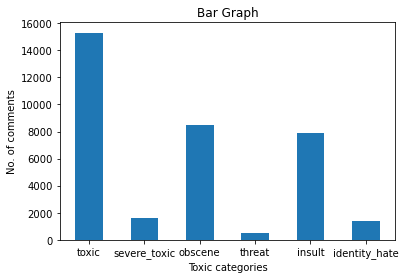

In [9]:
# Counting the no. of toxic/bad comments under each category
# Plotting bar chart for the obtained data to identify under which category more comments fall

No_of_toxic = (output_labels['toxic'] == 1).sum()
No_of_severe_toxic = (output_labels['severe_toxic'] == 1).sum()
No_of_obscene = (output_labels['obscene'] == 1).sum()
No_of_threat = (output_labels['threat'] == 1).sum()
No_of_insult = (output_labels['insult'] == 1).sum()
No_of_identity_hate = (output_labels['identity_hate'] == 1).sum()

No_of_toxic_comments = [No_of_toxic, No_of_severe_toxic, No_of_obscene, No_of_threat, No_of_insult, No_of_identity_hate]
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

plt.bar(labels, No_of_toxic_comments, width=0.5)
plt.title("Bar Graph")
plt.xlabel("Toxic categories")
plt.ylabel("No. of comments")
plt.show()

In [10]:
y = (output_labels == 1).sum()
print("Total no. of toxic comments in each category\n",y)

Total no. of toxic comments in each category
 toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


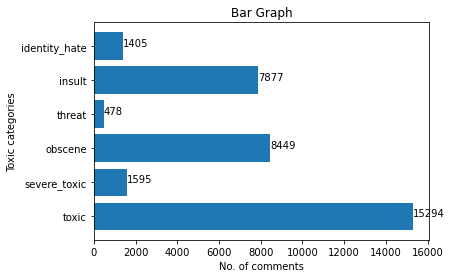

In [11]:
# Horizontal bar chart with count for each category

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
#plt.bar(labels, (output_labels == 1).sum(), width=0.5)
plt.title("Bar Graph")
plt.ylabel("Toxic categories")
plt.xlabel("No. of comments")

plt.barh(labels, (output_labels == 1).sum())
for i, val in enumerate(No_of_toxic_comments):
    plt.text(val, i, str(val))

plt.show()

<ipython-input-12-9f5a369446a9>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(labels, (output_labels == 1).sum(), width=0.5, color='bgymrc')


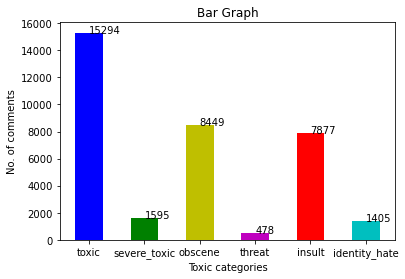

In [12]:
# Vertical bar chart with count for each category
# Same data in vertical bar chart with some attempts to have different colours for each category

plt.bar(labels, (output_labels == 1).sum(), width=0.5, color='bgymrc')
plt.title("Bar Graph")
plt.xlabel("Toxic categories")
plt.ylabel("No. of comments")

for i in range(6):
    plt.text(i, y[i], y[i])

plt.show()

From the plot, it is observed that Toxic category comments have highest frequency of occurrence. Next is the Obscene comments and then the Insult comments. The number of comments that fall under the categories severe_toxic, threat and identity_hate are lesser. This shows the data is imbalanced.

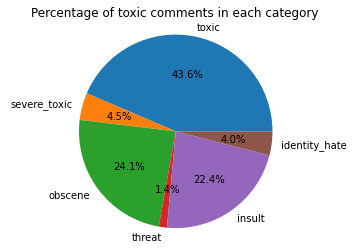

In [13]:
# Data can be viewed in percentage using pie chart for a better understanding

plt.pie(No_of_toxic_comments,labels=labels,autopct='%1.1f%%')
plt.title('Percentage of toxic comments in each category')
plt.axis('equal')
plt.show()

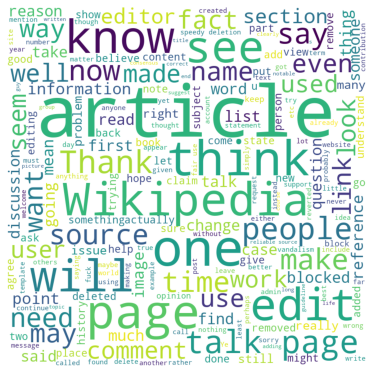

In [14]:
# Word Cloud of entire training data to have idea about the knid of words present in the dataset
from wordcloud import WordCloud
words = " ".join(comment for comment in training_data.comment_text.astype(str))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                       
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

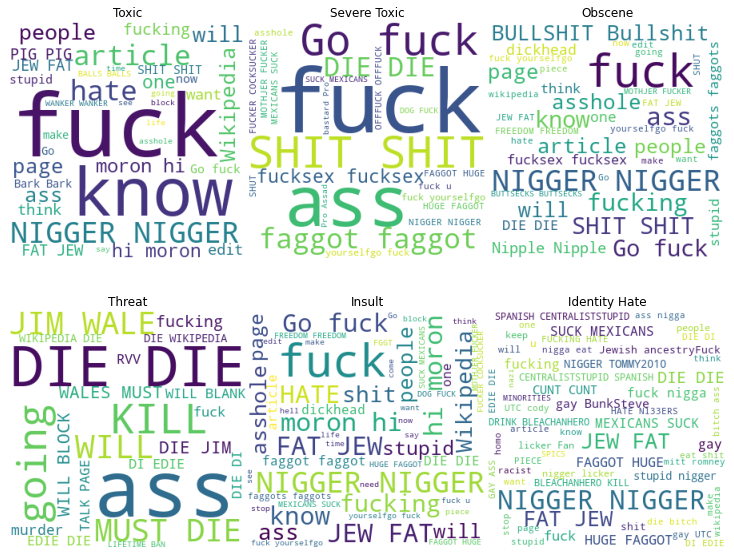

In [15]:
# Word Cloud of training data for each label to have idea about the knid of words present in that lable/ categorye dataset
tox_words = training_data.loc[training_data['toxic']==1,'comment_text']
toxic_words = " ".join(comment for comment in tox_words.astype(str))
wordcloud1 = WordCloud(width = 300, height = 300,
                background_color ='white',
                min_font_size = 10).generate(toxic_words)
rows = 2
columns = 3
# plot the WordCloud image                       
fig = plt.figure(figsize = (10,10), facecolor = None)

fig.add_subplot(rows, columns,1)
plt.imshow(wordcloud1)
plt.title('Toxic')
plt.axis("off")
plt.tight_layout(pad = 0)

sevtox_words = training_data.loc[training_data['severe_toxic']==1,'comment_text']
sevtoxic_words = " ".join(comment for comment in sevtox_words.astype(str))
wordcloud2 = WordCloud(width = 300, height = 300,
                background_color ='white',
                min_font_size = 10).generate(sevtoxic_words)

fig.add_subplot(rows, columns,2)
plt.imshow(wordcloud2)
plt.title('Severe Toxic')
plt.axis("off")
plt.tight_layout(pad = 0)

obsc_words = training_data.loc[training_data['obscene']==1,'comment_text']
obscene_words = " ".join(comment for comment in obsc_words.astype(str))
wordcloud3 = WordCloud(width = 300, height = 300,
                background_color ='white',
                min_font_size = 10).generate(obscene_words)

fig.add_subplot(rows, columns,3)
plt.imshow(wordcloud3)
plt.title('Obscene')
plt.axis("off")
plt.tight_layout(pad = 0)

thr_words = training_data.loc[training_data['threat']==1,'comment_text']
threat_words = " ".join(comment for comment in thr_words.astype(str))
wordcloud4 = WordCloud(width = 300, height = 300,
                background_color ='white',
                min_font_size = 10).generate(threat_words)

fig.add_subplot(rows, columns,4)
plt.imshow(wordcloud4)
plt.title('Threat')
plt.axis("off")
plt.tight_layout(pad = 0)

ins_words = training_data.loc[training_data['insult']==1,'comment_text']
insult_words = " ".join(comment for comment in ins_words.astype(str))
wordcloud5 = WordCloud(width = 300, height = 300,
                background_color ='white',
                min_font_size = 10).generate(insult_words)

fig.add_subplot(rows, columns,5)
plt.imshow(wordcloud5)
plt.title('Insult')
plt.axis("off")
plt.tight_layout(pad = 0)

hate_words = training_data.loc[training_data['identity_hate']==1,'comment_text']
idhate_words = " ".join(comment for comment in hate_words.astype(str))
wordcloud6 = WordCloud(width = 300, height = 300,
                background_color ='white',
                min_font_size = 10).generate(idhate_words)

fig.add_subplot(rows, columns,6)
plt.imshow(wordcloud6)
plt.title('Identity Hate')
plt.axis("off")
plt.tight_layout(pad = 0)

In [16]:
# To determine the percentage of good & bad comments in the dataset

good = training_data[(training_data['toxic']!=1) & (training_data['severe_toxic']!=1) &
                             (training_data['obscene']!=1) & (training_data['threat']!=1) &
                             (training_data['insult']!=1) & (training_data['identity_hate']!=1)]
print('Percentage of good comments is ', len(good)/len(training_data)*100)
print('Percentage of bad/toxic comments is',100-len(good)/len(training_data)*100)

Percentage of good comments is  89.83211235124176
Percentage of bad/toxic comments is 10.167887648758239


In [17]:
# Identify the comments that fall under more than one category
# Find the sum of each row i.e. label values.
# Sum will be greater than 1, if the comments falls under more than 1 category.
# Count the total number of rows with sum > 1 

No_of_comm_more_cat = (training_data.sum(axis=1) > 1).sum(axis=0)
print("Total no. of comments that fall under more than one category:",No_of_comm_more_cat)

Total no. of comments that fall under more than one category: 9865


<AxesSubplot:title={'center':'Correlation among the categories'}>

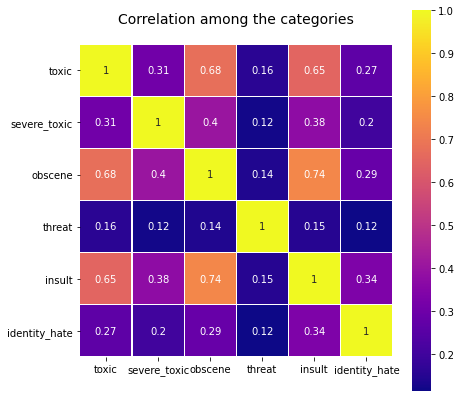

In [18]:
# To find the correlations among the categories/labels
import seaborn as sns
op_lbl = output_labels
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation among the categories',y=1.05,size=14)
sns.heatmap(op_lbl.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [19]:
# The above correlation plot show that
# Obscene comments and Insult comments are highly correlated and has a value of 0.74
# Toxic and Obscene comments are correlated having a value of 0.68 and so on.
# Threat and Obscene comments, threat and severe toxic comments, threat and identity hate comments have less correlation.
# Similarly, the correlation between Threat and obscene comments are also lesser and so on.

In [20]:
# Data cleaning of  Training data
# Load the regular expression library
# Remove punctuations and convert text to lowercase
import re

training_data['comment_text_pp'] = training_data['comment_text'].map(lambda x: re.sub('[,\.!?]', '', x))
training_data['comment_text_pp'] = training_data['comment_text_pp'].map(lambda x: x.lower())
training_data['comment_text_pp'].head()

0    explanation\nwhy the edits made under my usern...
1    d'aww he matches this background colour i'm se...
2    hey man i'm really not trying to edit war it's...
3    "\nmore\ni can't make any real suggestions on ...
4    you sir are my hero any chance you remember wh...
Name: comment_text_pp, dtype: object

In [21]:
# Tokenize this preprocessed data
# Tokenization and preprocessing can be done using different library packages like nltk, gensim and so on
# Implementation using nltk and gensim have been done and finally implementation using gensim has been chosen

import nltk
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])
import gensim
from gensim.utils import simple_preprocess

#training_data['tok_comment_text_pp'] = training_data['comment_text_pp'].apply(tokenizer.tokenize)
#training_data_toks = word_tokenize(training_data.comment_text_pp)
#data_words = [text for text in training_data_toks if not text in stopwords.words("english")]

In [22]:
# Tokenization of the preprocessed data and removal of the stopwords using gensim
# Function to convert the sentences to words - Tokenize

def conv_words(data):
    for sent in data:
        yield(gensim.utils.simple_preprocess(str(sent), deacc=True))  # deacc=True removes punctuations

# Function to remove the stopwords from the dataset

def remove_stopwords(data):
    return [[word for word in simple_preprocess(str(text)) if word not in stop_words] for text in data]

data = training_data.comment_text_pp.values.tolist()
train_data_words = list(conv_words(data))
train_data_words = remove_stopwords(train_data_words)

In [23]:
%%time

# Building n-grams models - bigrams and trigrams
# Only bigrams is used in the process in order to keep the process less complex

bigram = gensim.models.Phrases(train_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[train_data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

Wall time: 28.4 s


In [24]:
%%time

def form_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
#def form_trigrams(texts):
 #   return [trigram_mod[bigram_mod[doc]] for doc in texts]
training_data_bigrams = form_bigrams(train_data_words)
#training_data_trigrams = form_trigrams(data_words_bigrams)

Wall time: 10.4 s


In [25]:
import spacy

import en_core_web_sm
nlp = en_core_web_sm.load()

In [28]:
# Stemming or Lemmatization can be done.
# This dataset involves toxic comments
# Stemming removes the prefix and suffix in a word and convert it to a more simpler form which is the stem
# Lemmatization converts various forms of same word to base or root form which is the lemma
# For this dataset stemming may mislead to wrong classification unlike the research / scientific papers datasets and so on.
# So lemmatization has been implemented

# Lemmatization of the preprocessed tokenized data
# Function to lemmatize the data
def lemmatize(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    lem_text = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        lem_text.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return lem_text

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize keeping noun, adjective, verb, adverb
data_lem = lemmatize(training_data_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [29]:
# Creation of corpus and dictionary

import gensim.corpora as corpora

#creating a dictionary for lemmatized training data
dict_training = corpora.Dictionary(data_lem)

#corpus is the lemmatized training data
corpus_data = data_lem

# Extracting the features of the text - converting text to numerical form
# Different methods like Bag of Words, TF_IDF, Word embedings like word2vec, GloVe and so on can be used
# Bag of words give the frequency of occurence of the words

# Determine the Bag Of Words
corpus_bow = [dict_training.doc2bow(text) for text in corpus_data]

In [30]:
#printing sample values from bag of words

print(corpus_bow[:10][0][:10])
weight_words = [[(dict_training[word], count) for word, count in data] for data in corpus_bow]
print(weight_words[:10][0][:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
[('closure', 1), ('doll', 1), ('edit', 1), ('explanation', 1), ('fac', 1), ('fan', 1), ('gas', 1), ('hardcore', 1), ('make', 1), ('metallica', 1)]


In [31]:
# TF_IDF gives the importance of a word in the given document by weighting factors
# So TF_IDF is chosen in this implementation

# TF_IDF can be implemented using different library packages like nltk, gensim, scikit learn and so on
# It has been implemented using gensim and scikit learn
# TF_IDF in gensim using bag of words as the input
corpus_tfidf = gensim.models.TfidfModel(corpus_bow, smartirs ='ntc')
corpus_tfidf_wt = corpus_tfidf[corpus_bow]

In [32]:
# Viewing sample values in different ways
print(corpus_tfidf_wt[2])

[(2, 0.22888318952318903), (11, 0.09417924592546717), (12, 0.15213053434479748), (15, 0.09870060929174634), (27, 0.2680210800599832), (28, 0.23776200503763187), (29, 0.3443571474017589), (30, 0.28644557328982684), (31, 0.23263343313222418), (32, 0.24750818142197406), (33, 0.16579023389711553), (34, 0.22401867159017072), (35, 0.1730608748925566), (36, 0.24592087315482902), (37, 0.16584194338505426), (38, 0.43336762795399725), (39, 0.16223304116164353), (40, 0.22748874608868636)]


In [33]:
# View the sample weight values
tfidf_wt = corpus_tfidf[corpus_bow[2]]
print('tfidf_wt',tfidf_wt)

tfidf_wt [(2, 0.22888318952318903), (11, 0.09417924592546717), (12, 0.15213053434479748), (15, 0.09870060929174634), (27, 0.2680210800599832), (28, 0.23776200503763187), (29, 0.3443571474017589), (30, 0.28644557328982684), (31, 0.23263343313222418), (32, 0.24750818142197406), (33, 0.16579023389711553), (34, 0.22401867159017072), (35, 0.1730608748925566), (36, 0.24592087315482902), (37, 0.16584194338505426), (38, 0.43336762795399725), (39, 0.16223304116164353), (40, 0.22748874608868636)]


In [34]:
# View the sample weight values sorted in descending order
sorted_tfidf_wt = sorted(tfidf_wt,key = lambda wt: wt[1], reverse=True)
print('sorted_tfidf_wt:',sorted_tfidf_wt)

sorted_tfidf_wt: [(38, 0.43336762795399725), (29, 0.3443571474017589), (30, 0.28644557328982684), (27, 0.2680210800599832), (32, 0.24750818142197406), (36, 0.24592087315482902), (28, 0.23776200503763187), (31, 0.23263343313222418), (2, 0.22888318952318903), (40, 0.22748874608868636), (34, 0.22401867159017072), (35, 0.1730608748925566), (37, 0.16584194338505426), (33, 0.16579023389711553), (39, 0.16223304116164353), (12, 0.15213053434479748), (15, 0.09870060929174634), (11, 0.09417924592546717)]


In [35]:
# To view the word and it's weight - sample
for word_id, word_wt in sorted_tfidf_wt[:10]:
    print('{0}:{1}'.format(dict_training.get(word_id),word_wt))

talking:0.43336762795399725
constantly:0.3443571474017589
format:0.28644557328982684
actual:0.2680210800599832
info:0.24750818142197406
relevant:0.24592087315482902
care:0.23776200503763187
guy:0.23263343313222418
edit:0.22888318952318903
war:0.22748874608868636


In [36]:
# TF_IDF using TF_IDF Vectorizer of sklearn library package
# This function uses raw data or the data in sentence form as input and detokenizes the tokenized data
# Here the lemmatized data is detokenized and used as the input to tfidf vectorizer

# De-tokenization to form the input sentence for tfidf vectorizer 
detok_train_data = []

for i in range(len(training_data)):
  toks = ' '.join(data_lem[i])
  detok_train_data.append(toks)

training_data['Detok_text'] = detok_train_data
# corpus_tfidf_vects=tfidf_vect.fit_transform(training_data['Detok_text'])

# Preparation of Test dataset

In [37]:
# Test dataset preparation by merging the test data and test label files
# Remove the omments that have not been considered for classification
# This has been marked as -1 under all labels/categories in the given dataset
# Remove the rows for which sum of the values under the labels is equal to -6

test_data = pd.read_csv("test.csv", encoding='latin1')
test_lbls = pd.read_csv("test_labels.csv", encoding = 'unicode_escape')

test_new = pd.merge(test_data, test_lbls, left_on = 'id', right_on = 'id', how = 'inner')
test_new['sumRows']=test_new.iloc[:,2:].sum(axis=1)

#final dataset for testing
test_final = test_new[test_new['sumRows']!=-6].iloc[:,1:-1]
test_final.reset_index(drop=True, inplace=True)

In [38]:
test_data.head()
test_data.shape

(153164, 2)

In [39]:
test_final.head()
test_final.shape

(63939, 7)

In [40]:
testdata_labels = test_final[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [41]:
toxic_testdata = (testdata_labels == 1).sum()
print("Total no. of toxic comments in each category\n",toxic_testdata)

Total no. of toxic comments in each category
 toxic            6084
severe_toxic      367
obscene          3687
threat            211
insult           3425
identity_hate     712
dtype: int64


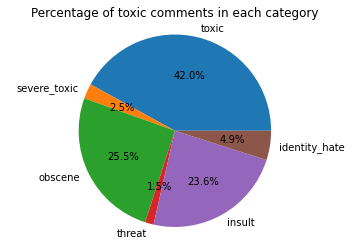

In [42]:
# Data can be viewed in percentage using pie chart for a better understanding
tstlbl = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.pie(toxic_testdata,labels=tstlbl,autopct='%1.1f%%')
plt.title('Percentage of toxic comments in each category')
plt.axis('equal')
plt.show()

In [43]:
# Unwanted dataframes can be deleted
# del(test_data, test_lbls, test_new)

In [44]:
# Data cleaning of Test Dataset

test_final['comment_text_pp'] = test_final['comment_text'].map(lambda x: re.sub('[,\.!?]', '', x))
test_final['comment_text_pp'] = test_final['comment_text_pp'].map(lambda x: x.lower())
test_final['comment_text_pp'].head()

0    thank you for understanding i think very highl...
1                      :dear god this site is horrible
2    "::: somebody will invariably try to add relig...
3    " \n\n it says it right there that it is a typ...
4    " \n\n == before adding a new product to the l...
Name: comment_text_pp, dtype: object

In [45]:
# Tokenization of the preprocessed data and removal of the stopwords using gensim
# Function to convert the sentences to words - Tokenize

def conv_words(data):
    for sent in data:
        yield(gensim.utils.simple_preprocess(str(sent), deacc=True))  # deacc=True removes punctuations

# Function to remove the stopwords from the dataset

def remove_stopwords(data):
    return [[word for word in simple_preprocess(str(text)) if word not in stop_words] for text in data]

data = test_final.comment_text_pp.values.tolist()
test_data_words = list(conv_words(data))
test_data_words = remove_stopwords(test_data_words)

In [46]:
%%time

# Building n-grams models - bigrams 

bigram = gensim.models.Phrases(test_data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

Wall time: 12.1 s


In [47]:
%%time

def form_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
test_data_bigrams = form_bigrams(test_data_words)

Wall time: 3.69 s


In [48]:
# Lemmatization of the preprocessed tokenized test data
# Function to lemmatize the data
def lemmatize(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    lem_text = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        lem_text.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return lem_text

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize keeping noun, adjective, verb, adverb
test_data_lem = lemmatize(test_data_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [49]:
# De-tokenization to form the input sentence for tfidf vectorizer 
detok_test_data = []

for i in range(len(test_final)):
  toks = ' '.join(test_data_lem[i])
  detok_test_data.append(toks)

test_final['Detok_text'] = detok_test_data
# corpus_tfidf_vects=tfidf_vect.fit_transform(training_data['Detok_text'])

In [50]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss
from sklearn.metrics import hamming_loss

In [51]:
# calculating TF_IDF using sklearn - TfidfVectorizer

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer 

# Intialize and pass the doc to calculate tfidf

tfidf_vect = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(2,2), norm='l2')

train_tfidf_vects=tfidf_vect.fit_transform(training_data['Detok_text'])
test_tfidf_vects=tfidf_vect.transform(test_final['Detok_text'])

In [52]:
x_label_train = training_data[labels]
x_label_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [53]:
x_label_test = test_final[labels]
x_label_test

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63934,0,0,0,0,0,0
63935,0,0,0,0,0,0
63936,0,0,0,0,0,0
63937,1,0,1,0,1,0


In [126]:
training_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'comment_text_pp', 'Detok_text'],
      dtype='object')

In [55]:
import pickle

In [117]:
# Logistic Regression

lgr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lgr_model = OneVsRestClassifier(lgr)

lgr_conf_mat = pd.DataFrame(columns = labels)
print("COnf MAt:",lgr_conf_mat)

#from sklearn.metrics import multilabel_confusion_matrix
for label in labels:
    lgr_model.fit(train_tfidf_vects, x_label_train[label])
    
    op_clfd_lgr = lgr_model.predict(test_tfidf_vects)
    
    lgr_accuracy = accuracy_score(x_label_test[label], op_clfd_lgr)
    lgr_f1 = f1_score(x_label_test[label], op_clfd_lgr, average='weighted')
    
    op_clfd_lgr_pp = lgr_model.predict_proba(test_tfidf_vects)
    
    lgr_logloss = log_loss(x_label_test[label], op_clfd_lgr_pp)
    lgr_hloss = hamming_loss(x_label_test[label], op_clfd_lgr)
    
    lgr_conf_mat[label] = op_clfd_lgr
    
    result = {
        "Accuracy": [" %.2f%% "% (lgr_accuracy*100)],
        "F1 score": [(lgr_f1)],
        "Log loss": [(lgr_logloss)],
        "Hamming loss": [(lgr_hloss)]
}
    
    lgr_perf = pd.DataFrame(result)
    print("Performance Metrics:", label,"comment\n", lgr_perf)
  

COnf MAt: Empty DataFrame
Columns: [toxic, severe_toxic, obscene, threat, insult, identity_hate]
Index: []
Performance Metrics: toxic comment
    Accuracy  F1 score  Log loss  Hamming loss
0   90.68%   0.865873   0.30609      0.093167
Performance Metrics: severe_toxic comment
    Accuracy  F1 score  Log loss  Hamming loss
0   99.40%   0.991439  0.035764      0.006006
Performance Metrics: obscene comment
    Accuracy  F1 score  Log loss  Hamming loss
0   94.40%   0.919235  0.211024      0.056038
Performance Metrics: threat comment
    Accuracy  F1 score  Log loss  Hamming loss
0   99.67%   0.995053  0.022052        0.0033
Performance Metrics: insult comment
    Accuracy  F1 score  Log loss  Hamming loss
0   94.74%   0.923828  0.202661      0.052613
Performance Metrics: identity_hate comment
    Accuracy  F1 score  Log loss  Hamming loss
0   98.89%   0.983328  0.061428      0.011136


In [138]:
#Method to pickle the vectorized data and model
def lr_model(df, toxicClass):
    
    X = df.Detok_text
    y = df[toxicClass]

    # Vectorize using TfidfVectorizer
    tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    
    X_vectorized = tfidf.fit_transform(X)  
    
    #Pickling the Vocabulary
    with open(r"{}.pkl".format(toxicClass + '_vectorized'), "wb") as f:   
        pickle.dump(tfidf, f)   
        
    lgr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
    lgr_model = OneVsRestClassifier(lgr)
    lgr_model.fit(X_vectorized, y)

    # Pickling the model
    with open(r"{}.pkl".format('lr_' +toxicClass + '_model'), "wb") as f:  
        pickle.dump(lgr_model, f)

In [139]:
#Loopint through the toxic classses to pickle the models
for label in labels:
    lr_model(training_data, label)

In [238]:
#conf_mat = confusion_matrix(x_label_test.values.argmax(axis=1), lgr_conf_mat.values.argmax(axis=1),labels)
#conf_mat
#fin_conf_mat = pd.DataFrame(conf_mat, index = [i for i in labels], columns = [i for i in labels])
#fin_conf_mat = pd.DataFrame(conf_mat, index = labels, columns = labels)
#fin_conf_mat

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

lgr_mlconf_mat = multilabel_confusion_matrix(x_label_test,lgr_conf_mat)
print("Confusion Matrix for each category:\n",lgr_mlconf_mat)
print("Classification Report: Precision, Recall & F1-score:\n",classification_report(x_label_test,lgr_conf_mat,target_names=labels))

Confusion Matrix for each category:
 [[[57837    51]
  [ 5912   178]]

 [[63588    23]
  [  361     6]]

 [[60253    34]
  [ 3553   138]]

 [[63767     0]
  [  211     0]]

 [[60512    39]
  [ 3328    99]]

 [[63266     0]
  [  712     0]]]
Classification Report: Precision, Recall & F1-score:
                precision    recall  f1-score   support

        toxic       0.78      0.03      0.06      6090
 severe_toxic       0.21      0.02      0.03       367
      obscene       0.80      0.04      0.07      3691
       threat       0.00      0.00      0.00       211
       insult       0.72      0.03      0.06      3427
identity_hate       0.00      0.00      0.00       712

    micro avg       0.74      0.03      0.06     14498
    macro avg       0.42      0.02      0.04     14498
 weighted avg       0.71      0.03      0.06     14498
  samples avg       0.00      0.00      0.00     14498



In [232]:
# Classification using Naive Bayes
# Multinomial Naive Bayes Classifier is suitable for the classification problems with features taking discrete values

nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nb_model = OneVsRestClassifier(nb)

nb_conf_mat = pd.DataFrame(columns = labels)

for label in labels:
    nb_model.fit(train_tfidf_vects, x_label_train[label])
    op_clfd_nb = nb_model.predict(test_tfidf_vects)
    
    nb_accuracy = accuracy_score(x_label_test[label], op_clfd_nb)
        
    op_clfd_nb_pp = lgr_model.predict_proba(test_tfidf_vects)
    
    nb_logloss = log_loss(x_label_test[label], op_clfd_nb_pp)
    nb_hloss = hamming_loss(x_label_test[label], op_clfd_nb)
    
    nb_conf_mat[label] = op_clfd_nb
    
    result = {
        "Accuracy": [" %.2f%% "% (nb_accuracy*100)],
        "Log loss": [(nb_logloss)],
        "Hamming loss": [(nb_hloss)]
}
    
    nb_perf = pd.DataFrame(result)
    print("Performance Metrics:", label,"comment\n", nb_perf)

Performance Metrics: toxic comment
    Accuracy  Log loss  Hamming loss
0   90.89%   0.457861      0.091125
Performance Metrics: severe_toxic comment
    Accuracy  Log loss  Hamming loss
0   99.43%   0.035962      0.005736
Performance Metrics: obscene comment
    Accuracy  Log loss  Hamming loss
0   94.39%   0.281007      0.056129
Performance Metrics: threat comment
    Accuracy  Log loss  Hamming loss
0   99.67%   0.024462      0.003298
Performance Metrics: insult comment
    Accuracy  Log loss  Hamming loss
0   94.66%   0.261545      0.053393
Performance Metrics: identity_hate comment
    Accuracy  Log loss  Hamming loss
0   98.89%   0.061396      0.011129


In [237]:
nb_mlconf_mat = multilabel_confusion_matrix(x_label_test,nb_conf_mat)
print("Confusion Matrix for each category:\n",nb_mlconf_mat)
print("Classification Report: Precision, Recall & F1-score:\n",classification_report(x_label_test,nb_conf_mat,target_names=labels))

Confusion Matrix for each category:
 [[[57884     4]
  [ 5826   264]]

 [[63611     0]
  [  367     0]]

 [[60287     0]
  [ 3591   100]]

 [[63767     0]
  [  211     0]]

 [[60551     0]
  [ 3416    11]]

 [[63266     0]
  [  712     0]]]
Classification Report: Precision, Recall & F1-score:
                precision    recall  f1-score   support

        toxic       0.99      0.04      0.08      6090
 severe_toxic       0.00      0.00      0.00       367
      obscene       1.00      0.03      0.05      3691
       threat       0.00      0.00      0.00       211
       insult       1.00      0.00      0.01      3427
identity_hate       0.00      0.00      0.00       712

    micro avg       0.99      0.03      0.05     14498
    macro avg       0.50      0.01      0.02     14498
 weighted avg       0.90      0.03      0.05     14498
  samples avg       0.00      0.00      0.00     14498



In [231]:
# Classification using SVM
# SVM is said to perform well and can handle high dimensional data.
# SVM generally does not suffer from overfitting.
# So SVM has been chosen for this multilabel classification problem

svm = LinearSVC()
svm_model = OneVsRestClassifier(svm)
svm_conf_mat = pd.DataFrame(columns = labels)

for label in labels:
    svm_model.fit(train_tfidf_vects, x_label_train[label])
    op_clfd_svm = svm_model.predict(test_tfidf_vects)
    
    svm_accuracy = accuracy_score(x_label_test[label], op_clfd_svm)
        
    op_clfd_svm_pp = lgr_model.predict_proba(test_tfidf_vects)
    
    svm_logloss = log_loss(x_label_test[label], op_clfd_svm_pp)
    svm_hloss = hamming_loss(x_label_test[label], op_clfd_nb)
    
    svm_conf_mat[label] = op_clfd_svm
    
    result = {
        "Accuracy": [" %.2f%% "% (svm_accuracy*100)],
        "Log loss": [(svm_logloss)],
        "Hamming loss": [(svm_hloss)]
}
    
    svm_perf = pd.DataFrame(result)
    print("Performance Metrics:", label,"comment\n", svm_perf)

Performance Metrics: toxic comment
    Accuracy  Log loss  Hamming loss
0   92.01%   0.457861      0.095189
Performance Metrics: severe_toxic comment
    Accuracy  Log loss  Hamming loss
0   99.35%   0.035962      0.005736
Performance Metrics: obscene comment
    Accuracy  Log loss  Hamming loss
0   95.38%   0.281007      0.057692
Performance Metrics: threat comment
    Accuracy  Log loss  Hamming loss
0   99.65%   0.024462      0.003298
Performance Metrics: insult comment
    Accuracy  Log loss  Hamming loss
0   95.41%   0.261545      0.053565
Performance Metrics: identity_hate comment
    Accuracy  Log loss  Hamming loss
0   98.96%   0.061396      0.011129


In [239]:
svm_mlconf_mat = multilabel_confusion_matrix(x_label_test,svm_conf_mat)
print("Confusion Matrix for each category:\n",svm_mlconf_mat)
print("Classification Report: Precision, Recall & F1-score:\n",classification_report(x_label_test,svm_conf_mat,target_names=labels))

Confusion Matrix for each category:
 [[[57333   555]
  [ 4560  1530]]

 [[63511   100]
  [  315    52]]

 [[60049   238]
  [ 2716   975]]

 [[63735    32]
  [  195    16]]

 [[60284   267]
  [ 2672   755]]

 [[63254    12]
  [  655    57]]]
Classification Report: Precision, Recall & F1-score:
                precision    recall  f1-score   support

        toxic       0.73      0.25      0.37      6090
 severe_toxic       0.34      0.14      0.20       367
      obscene       0.80      0.26      0.40      3691
       threat       0.33      0.08      0.12       211
       insult       0.74      0.22      0.34      3427
identity_hate       0.83      0.08      0.15       712

    micro avg       0.74      0.23      0.35     14498
    macro avg       0.63      0.17      0.26     14498
 weighted avg       0.74      0.23      0.35     14498
  samples avg       0.02      0.02      0.02     14498



In [ ]:
# From the above results of Logistic Regression, Multinomial Naive Bayes and Support Vector Machine,
# It is observed that Logistic Regression and Multinomial NB did not perform well
# In logistic regression, it's clear from the confusion matrix and the classification report,
# there's no proper prediction for the labels threat and identity hate
# Similarly, from the confusion matrix and the classification report of Multinomial NB,
# it is observed that there are no proper predictions for severe toxic, threat and ientity hate
# The results of svm, show F1 score and Accuracy for each of the categories as:
# F1 Score: Toxic:0.37, severe toxic:0.20, obscene:0.40, threat:0.12, insult:034 and identity hate:0.15
# Accuracy: Toxic:92.01, severe toxic:99.35, obscene:95.38, threat:99.65, insult:95.41 and identity hate:98.96
# The data is unbalanced which can be seen in the pie chart given above
# It contains only 2.5% of severe toxic comments, 1.5% of threat comments and 4.9% of identty hate comments.
# Hence the accuracy is high and f1 score is lesser for these categories.
# Among the three algorithms, performance of support vector machine is better in toxic comment classification

In [ ]:
# HyperParameter Tuning
# The constant parameter in logistic regression has been chosen as 0.1 to consider the penalty in full.
# This parameter can be varied diluting the penalty and the performance can be observed.
# The algorithm can also be implemented for l2 penalty / regularization technique 
# Same way the parameters in the other two algorithms may be changed
# and the performance may be analyzed.

In [ ]:
# Multilabel Classification can be done with some of the advanced algorithms
# like convolutional neural network, recurrent neural network, transformers like bert and so on.
# LSTM is said to overcome the problems of vanishing gradient and exploding gradient problems of RNN
# Hence it is decided to use LSTM

In [ ]:
# Following is Classification using an artificial RNN architecture, Long Short-Term Memory (LSTM)
# It has been implemented using Keras package

In [98]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [92]:
# Preparation of the data suitable for the model
# The dataset from previous sreps after removing the punctuations and stop words is considered

jn_train_data = []

for i in range(len(training_data)):
  tks = ' '.join(train_data_words[i])
  jn_train_data.append(tks)

training_data['jn_text'] = jn_train_data

In [90]:
jn_test_data = []

for i in range(len(test_final)):
  tks = ' '.join(test_data_words[i])
  jn_test_data.append(tks)

test_final['jn_text'] = jn_test_data

In [95]:
lstm_train_data = training_data['jn_text']
lstm_test_data = test_final['jn_text']
lstm_train_label=training_data[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]

In [99]:
# Tokenization
# Creation of corpus of words and coversion to integer and then susbstituing it in sentences - prepare tokenizer
# Max. no. of words for corpus is chosen - Selecting top most commonly occuring words in the dataset
# Too low value will lead to loss of words and too high value will increase the complexity
max_words = 30000
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(lstm_train_data)

# conversion of text to numerical values with help of tokenizer.
lstm_train = tokenizer.texts_to_sequences(lstm_train_data)
lstm_test = tokenizer.texts_to_sequences(lstm_test_data)

In [243]:
# Max. no. of words for a sentence is chosen. 
# Each sentence is of unequal length.
# To have sentences of equal length padding of zeros is done using pad_sequences
# If length of the sentence is lesser than the max value, padding is done.
# If length of the sentence is greater than the max vaue, it truncates the words

max_word_len = 1000
lstm_pad_train =pad_sequences(lstm_train, maxlen=max_word_len)
lstm_pad_test =pad_sequences(lstm_test, maxlen=max_word_len)
print("Shape of training data",lstm_pad_train.shape)
print("Shape of testing data",lstm_pad_test.shape)

Shape of training data (159571, 1000)
Shape of testing data (63978, 1000)


In [132]:
# Building a model - Sequential model using LSTM
# Initial layer has a word embedding layer with 64 hidden units. 
# Each Input is classified under 6 labels. 
# 2 LSTM layers are used with 64 hidden units.
# 1 Dense layer used as an output layer.
# Dropout probability is set to 0.2 
# Dropout is used a regularization method to avoid overfitting
# Too high value will also lead to miss something which is importanat and hence chosen the standard value 0.2
# Output layer contains 6 hidden units. 
# Since this is a multilabel problem, sigmoid activation function is used in the output layer.

# Initiate Sequential model and add the required layers
# Dropout specifies the probability at which outputs of the layer are dropped out in case of overfitting

model = Sequential()
model.add(Embedding(max_words, 64))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          1920000   
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 1,986,438
Trainable params: 1,986,438
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Compile and train the model using training dataset
# Loss function to measure the loss is specified. 
# For multi label multi classification problem, binary_crossentropy is used
# SGD and Adam optimizers have been chosen in model to analyze the performance
# Accuracy is used as the performance metric.
# Dataset is divided into training and validation set. 

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["acc"])

#model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["acc"])

x_train, x_val, y_train, y_val = train_test_split(lstm_pad_train, lstm_train_label, shuffle = True, random_state = 123)

#model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=1, validation_split=0.3)
#model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_val, y_val))
#model.fit(lstm_pad_train, lstm_train_label, batch_size = 64, epochs = 5, verbose=1, validation_split=0.3)
#model.fit(x_train, y_train, batch_size = 64, epochs = 5, verbose=1, validation_split=0.3)

In [156]:
hist_1epoch = model.fit(x_train, y_train, batch_size = 64, epochs = 1, verbose=1, validation_split=0.3)

Train on 83774 samples, validate on 35904 samples
Epoch 1/1
83774/83774 [==============================] - 3940s 47ms/step - loss: 0.0342 - acc: 0.9869 - val_loss: 0.0577 - val_acc: 0.9791


In [157]:
score_1epoch = model.evaluate(lstm_pad_test,x_label_test,verbose=1)

63978/63978 [==============================] - 1010s 16ms/step


In [305]:
print("Results of Model without pretrained word embeddings: Training- 1 epoch ")
print("Loss:", score_1epoch[0])
print("Accuracy:", score_1epoch[1])

Results of Model without pretrained word embeddings: Training- 1 epoch 
Loss: 0.08643485730195832
Accuracy: 0.9656634330749512


In [ ]:
# Training and validating the same model for 5 epochs to improve the accuracy of the model

In [134]:
model.fit(x_train, y_train, batch_size = 64, epochs = 5, verbose=1, validation_split=0.3)


Train on 83774 samples, validate on 35904 samples
Epoch 1/5
83774/83774 [==============================] - 2970s 35ms/step - loss: 0.0919 - acc: 0.9733 - val_loss: 0.0538 - val_acc: 0.9805
Epoch 2/5
83774/83774 [==============================] - 2878s 34ms/step - loss: 0.0500 - acc: 0.9819 - val_loss: 0.0514 - val_acc: 0.9811
Epoch 3/5
83774/83774 [==============================] - 33190s 396ms/step - loss: 0.0443 - acc: 0.9835 - val_loss: 0.0508 - val_acc: 0.9814
Epoch 4/5
83774/83774 [==============================] - 3778s 45ms/step - loss: 0.0405 - acc: 0.9847 - val_loss: 0.0545 - val_acc: 0.9811
Epoch 5/5
83774/83774 [==============================] - 2570s 31ms/step - loss: 0.0371 - acc: 0.9859 - val_loss: 0.0552 - val_acc: 0.9807


In [135]:
# Prediction for test data i.e predict probabilities for test dataset
predict = model.predict(lstm_pad_test)

In [355]:
confmat = multilabel_confusion_matrix(x_label_test, predict)
print(confmat)

[[[53642  4246]
  [ 1148  4942]]

 [[63434   177]
  [  241   126]]

 [[59019  1268]
  [ 1004  2687]]

 [[63766     1]
  [  211     0]]

 [[59445  1106]
  [ 1507  1920]]

 [[63265     1]
  [  712     0]]]


In [137]:
print("Predicted values are:\n",predict)

Predicted values are:
 [[1.57585740e-03 1.28149986e-05 1.60127878e-04 5.64157963e-05
  2.25901604e-04 5.76972961e-05]
 [4.85508531e-01 3.89391184e-03 3.78187001e-02 1.27074420e-02
  7.42299259e-02 2.71632373e-02]
 [1.11049414e-02 4.33325768e-05 9.26464796e-04 1.46836042e-04
  1.42446160e-03 2.23457813e-04]
 ...
 [8.96222472e-01 1.21960342e-02 2.41465539e-01 2.55967677e-02
  2.67427742e-01 6.09141886e-02]
 [9.93033826e-01 1.31648242e-01 9.66313958e-01 1.62850320e-02
  8.08475614e-01 5.14653623e-02]
 [1.10233456e-01 1.66445971e-04 5.00244834e-03 5.70382283e-04
  7.64939841e-03 1.13190676e-03]]


In [139]:
# Predicted probabilities of each label for every comment

label_cols = np.array(['toxic','severe_toxic','obscene', 'threat','insult', 'identity_hate'])
f_pred_test = pd.concat([pd.DataFrame(predict, columns=label_cols)], 1)
tdcol1 = test_data['id']
f_pred_test = pd.concat([tdcol1,f_pred_test],1)
f_pred_test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.001576,0.000013,0.000160,0.000056,0.000226,0.000058
1,0000247867823ef7,0.485509,0.003894,0.037819,0.012707,0.074230,0.027163
2,00013b17ad220c46,0.011105,0.000043,0.000926,0.000147,0.001424,0.000223
3,00017563c3f7919a,0.000686,0.000006,0.000083,0.000028,0.000097,0.000027
4,00017695ad8997eb,0.000574,0.000005,0.000067,0.000021,0.000075,0.000022


In [153]:
score = model.evaluate(lstm_pad_test,x_label_test,verbose=1)

63978/63978 [==============================] - 618s 10ms/step


In [304]:
print("Results of Model without pretrained word embeddings: Training- 5 epochs ")
print("Loss:", score[0])
print("Accuracy:", score[1])

Results of Model without pretrained word embeddings: Training- 5 epochs 
Loss: 0.0769356503093275
Accuracy: 0.9697242975234985


In [ ]:
# Grpah can be plotted for the accuracy and loss values against epochs for training and validation
# To plot the accuracy following commands can be used
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# To plot the loss following commands can be used
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# In this case the value of the model.fit has not been stored in the history variable and hence couldn't plot the grph
# The time taken for training and validation for each epoch is almost an hour

In [ ]:
# The results from the above model with 1 epoch shows that 
# the loss is 0.08643485730195832 and the accuracy is 0.9656634330749512
# The results from the above model with 5 epochs shows that
# Loss is 0.0769356503093275 and Accuracy is 0.9697242975234985
# It is observed that when the number of epochs for training is increased,
# the loss is reduced and the accuracy is increased

In [ ]:
# To improve the performance of the model, pretrained word embeddings is incorporated
# The Following model is using pretrained word embedding "GloVe" 
# Word embeddings are used to include the semantic relationships between the words to achieve a better performance

In [ ]:
# Pretrained word embedding GloVe is used and the weights of the embedding matrix is used in the embedding layer

In [284]:
embeddings_index = {}
#f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
f = open('../NLP lab/glove.6B.100d.txt',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [292]:
word_index = tokenizer.word_index
embed_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [294]:
model2 = Sequential()
model2.add(Embedding(max_words, embed_dim, weights=[embedding_matrix]))
model2.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model2.add(LSTM(units = 64, dropout = 0.2))
model2.add(Dense(units = 6, activation = 'sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 64)          42240     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 3,075,654
Trainable params: 3,075,654
Non-trainable params: 0
_________________________________________________________________


In [295]:
model2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["acc"])

In [297]:
history=model2.fit(x_train, y_train, batch_size = 64, epochs = 1, verbose=1, validation_split=0.3)

Train on 83774 samples, validate on 35904 samples
Epoch 1/1
83774/83774 [==============================] - 3278s 39ms/step - loss: 0.0754 - acc: 0.9755 - val_loss: 0.0511 - val_acc: 0.9811


In [298]:
score2 = model2.evaluate(lstm_pad_test,x_label_test,verbose=1)

63978/63978 [==============================] - 833s 13ms/step


In [302]:
print("Results of Model including word embeddings: Training- 1epoch ")
print("Loss:", score2[0])
print("Accuracy:", score2[1])

Results of Model including word embeddings: Training- 1epoch 
Loss: 0.07415143853698206
Accuracy: 0.9705163836479187


In [ ]:
# The previous model without any word embeddings trained for 5 epochs achieved an accuracy of 96.97% 
# and the loss observed is 0.0769 
# The model incorporating the features of pretrained word embeddings
# has improved accuracy of 97.05% 
# and the loss observed is 0.07415
# It is observed that in this model the loss has been reduced and the accuracy has been increased

In [ ]:
# This model has been trained for 1 epoch and the time taken was around 1 hour.
# The performance of this model can be improved by training the dataset for more number of epochs.
# Also graph can be plotted for the accuracy and loss of training and validation 
# against epochs to see if there is any overfitting

In [ ]:
# An attempt to analyze the performance of the model with a different optimizer (SGD)
# and compare the two to find out which provides a better performance

In [322]:
model3 = Sequential()
model3.add(Embedding(max_words, embed_dim, weights=[embedding_matrix]))
model3.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model3.add(LSTM(units = 64, dropout = 0.2))
model3.add(Dense(units = 6, activation = 'sigmoid'))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 100)         3000000   
_________________________________________________________________
lstm_20 (LSTM)               (None, None, 64)          42240     
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 390       
Total params: 3,075,654
Trainable params: 3,075,654
Non-trainable params: 0
_________________________________________________________________


In [323]:
model3.compile(loss = "binary_crossentropy", optimizer = "sgd", metrics = ["acc"])

In [324]:
history3=model3.fit(x_train, y_train, batch_size = 64, epochs = 1, verbose=1, validation_split=0.3)

Train on 83774 samples, validate on 35904 samples
Epoch 1/1
83774/83774 [==============================] - 3325s 40ms/step - loss: 0.2147 - acc: 0.9588 - val_loss: 0.1422 - val_acc: 0.9634


In [325]:
score3 = model3.evaluate(lstm_pad_test,x_label_test,verbose=1)

63978/63978 [==============================] - 932s 15ms/step


In [326]:
print("Results of Model including word embeddings with \n Stochastic Gradient Descent (sgd) optimizer: Training- 1epoch ")
print("Loss:", score3[0])
print("Accuracy:", score3[1])

Results of Model including word embeddings with 
 Stochastic Gradient Descent (sgd) optimizer: Training- 1epoch 
Loss: 0.14562801308872858
Accuracy: 0.9622132778167725


In [ ]:
# Comparision of accuracy of the model with sgd optimizer and the model using Adam optimizer
# Accuracy of the model with sgd optimizer is only 96.22%
# whereas accuracy of the model with adam optimizer is 97.05%
# Therefore performance of the model implemented with pretrained word embedding GloVe and adam optimizer is better

In [ ]:
# To further improve the performance the model using - pretrained word embedding GloVe and adam optimizer is 
# now trained and validated for 5 epochs with increased batch size of 128

In [328]:
history=model2.fit(x_train, y_train, batch_size = 128, epochs = 5, verbose=1, validation_split=0.3)

Train on 83774 samples, validate on 35904 samples
Epoch 1/5
83774/83774 [==============================] - 5883s 70ms/step - loss: 0.0501 - acc: 0.9816 - val_loss: 0.0490 - val_acc: 0.9813
Epoch 2/5
83774/83774 [==============================] - 6066s 72ms/step - loss: 0.0456 - acc: 0.9828 - val_loss: 0.0472 - val_acc: 0.9819
Epoch 3/5
83774/83774 [==============================] - 42054s 502ms/step - loss: 0.0419 - acc: 0.9837 - val_loss: 0.0481 - val_acc: 0.9820
Epoch 4/5
83774/83774 [==============================] - 6745s 81ms/step - loss: 0.0387 - acc: 0.9848 - val_loss: 0.0473 - val_acc: 0.9821
Epoch 5/5
83774/83774 [==============================] - 6761s 81ms/step - loss: 0.0356 - acc: 0.9858 - val_loss: 0.0499 - val_acc: 0.9818


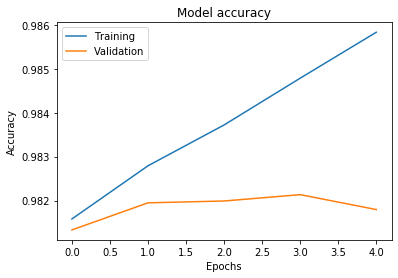

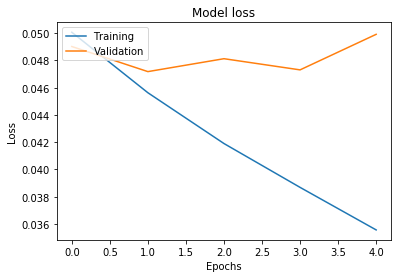

In [414]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# The above plot shows the accuracy and loss of training and validation data.
# Accuracy plot shows that accuracy of validation data is lesser than the accuracy of training data
# But the difference/variation is quite small
# Similarly the variation in the loss is less
# It is observed that the optimum number of epochs for this model is 3 
# beyond which the loss increases and accuracy reduces a little

In [329]:
score4 = model2.evaluate(lstm_pad_test,x_label_test,verbose=1)

63978/63978 [==============================] - 1099s 17ms/step


In [332]:
print("Results of LSTM Model including pretrained word embeddings GloVe \n with Adam optimizer for a batch size of 128 for 5 epochs: ")
print("Loss:", score4[0])
print("Accuracy:", score4[1])

Results of LSTM Model including pretrained word embeddings GloVe 
 with Adam optimizer for a batch size of 128 for 5 epochs: 
Loss: 0.07372942295984845
Accuracy: 0.9707865715026855


In [ ]:
# Summary

In [ ]:
# Logistic Regression:
         # 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
# Acc (%):  90.68     99.4           94.39      99.67     94.34     98.89
# F1 score: 0.06      0.03           0.07       0.00      0.06      0.00

# Multinomial Naive Bayes:
         # 'toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate'
# Acc (%):  90.89     99.43          94.39      99.67    94.66     98.89
# F1 score: 0.08      0.00           0.05       0.00     0.01      0.00

# SVM:
         # 'toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate'
# Acc (%):  92.01     99.35          95.38      99.65    95.41     98.96
# F1 score: 0.37      0.20           0.40       0.12     0.34      0.15

In [ ]:
# LSTM + Adam Optimizer + 1 epoch + Batch size - 64: Acc: 96.57%  & Loss: 0.0864
# LSTM + Adam Optimizer + 5 epochs + Batch size - 64: Acc: 96.97% & Loss: 0.0769
# LSTM + GloVe + Adam Optimizer + 1 epoch + Batch size - 64: Acc: 97.05% & Loss: 0.0742
# LSTM + GloVe + SGD Optimizer + 1 epoch + Batch size - 64: Acc: 96.22% & Loss: 0.1456
# LSTM + GloVe + Adam Optimizer + 5 epochs + Batch size - 128: Acc: 97.078% & Loss: 0.0737
# optimum number of epochs for this model is 3.

In [ ]:
# Exploratory Data Analysis and preprocessing is done on training and test data
# After cal. TFIDF, using OneVsRest classifier - Logistic Rgression, Naive Bayes and Support Vector Machine (SVM)
# has been implemented, of which the performance of SVM is better.
# To analyze the problem with advanced algorithm, LSTM model is used
# After preprocessing, LSTM model without any word embeddings has been implemnted with Adam optimizer and trained for 1 epoch
# To improve the performance, the same model has been trained and validated for 5 epochs.
# Comparing these, the model trained for 5 epochs has better performance.
# To further improve the accuracy of the model,
# LSTM with pretrained word embedding GloVe has been implemented with Adam optimizer and trained for 1 epoch
# The performance is also analyzed with the model using SGD optimizer trained for 1 epoch
# With these two models, LSTM model with pretrained word embedding GloVe, implemented with Adam optimizer
# trained for 1 epoch has better performance
# In all the above LSTM models, the batch size chosen is 64
# Finally, batch size is increased to 128 in LSTM + GloVe + Adam optimizer model
# and is trained and validated for 5 epochs 
# Among all the models, the last model with LSTM + GloVe + Adam optimizer + Batch size 128 
# trained and validated for 5 epochs performs better
# From the plot it can also be observed that optimal number of epochs for this model is 3.
# Therefore the LSTM model with GloVe pretrained word embeddings using Adam optimizer
# with a batch size of 128 efficiemtly classifies the toxic comments under 
# the six categories - Toxic, Severe toxic, Threat, Obscene, Insult and Identity hate

#References:

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/

https://surreylearn.surrey.ac.uk/d2l/home/216818

https://radimrehurek.com/gensim/models/tfidfmodel.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

http://seaborn.pydata.org/generated/seaborn.heatmap.html

https://scikit-learn.org/stable/modules/model_evaluation.html

https://dataaspirant.com/word-embedding-techniques-nlp/

https://keras.io/guides/working_with_rnns/

https://keras.io/api/

https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/

